# <h1>Intro to data structures</h1>

<p>We’ll start with a quick, non-comprehensive overview of the fundamental data
structures in pandas to get you started. The fundamental behavior about data
types, indexing, axis labeling, and alignment apply across all of the
objects. To get started, import NumPy and load pandas into your namespace:</p>

In [12]:
import numpy as np
import pandas as pd

<p>Fundamentally, <strong>data alignment is intrinsic</strong>. The link
between labels and data will not be broken unless done so explicitly by you.</p>

<p>We’ll give a brief intro to the data structures, then consider all of the broad categories of functionality and methods in separate sections.</p>

## <h2>Series</h2>

<p><a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series" title="pandas.Series"><code>Series</code></a> is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.).
The axis labels are collectively referred to as the <strong>index</strong>.
The basic method to create a <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series" title="pandas.Series"><code>Series</code></a> is to call:</p>

<pre>
s = pd.Series(data, index=index)
</pre>

<p>Here, <code>data</code> can be many different things:</p>

<ul>

<li><p>a Python dict</p></li>

<li><p>an ndarray</p></li>

<li><p>a scalar value (like 5)</p></li>

</ul>

<p>The passed <strong>index</strong> is a list of axis labels. Thus, this separates into a few cases depending on what <strong>data is</strong>:</p>

<p><strong>From ndarray</strong></p>

<p>If <code>data</code> is an ndarray, <strong>index</strong> must be the same length as <strong>data</strong>. If no index is passed, one will be created having values <code>[0, ..., len(data) - 1]</code>.</p>

In [13]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])

In [14]:
s

,0
a,0.542778
b,-0.015722
c,1.512196
d,0.525521
e,0.368557


In [15]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [16]:
pd.Series(np.random.randn(5))

,0
0,-1.340555
1,1.316961
2,-0.136618
3,0.206923
4,0.091714


<p>Note</p>

<p>pandas supports non-unique index values. If an operation
that does not support duplicate index values is attempted, an exception
will be raised at that time.</p>

<p><strong>From dict</strong></p>

<p><a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series" title="pandas.Series"><code>Series</code></a> can be instantiated from dicts:</p>

In [17]:
d = {"b": 1, "a": 0, "c": 2}

<p>If an index is passed, the values in data corresponding to the labels in the
index will be pulled out.</p>

In [18]:
d = {"a": 0.0, "b": 1.0, "c": 2.0}

In [19]:
pd.Series(d)

,0
a,0.0
b,1.0
c,2.0


In [20]:
pd.Series(d, index=["b", "c", "d", "a"])

,0
b,1.0
c,2.0
d,NaN
a,0.0


<p>Note</p>

<p>NaN (not a number) is the standard missing data marker used in pandas.</p>

<p><strong>From scalar value</strong></p>

<p>If <code>data</code> is a scalar value, an index must be
provided. The value will be repeated to match the length of <strong>index</strong>.</p>

In [21]:
pd.Series(5.0, index=["a", "b", "c", "d", "e"])

,0
a,5.0
b,5.0
c,5.0
d,5.0
e,5.0


### <h3>Series is ndarray-like</h3>

<p><a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series" title="pandas.Series"><code>Series</code></a> acts very similarly to a <code>ndarray</code> and is a valid argument to most NumPy functions.
However, operations such as slicing will also slice the index.</p>

In [22]:
s.iloc[0]

np.float64(0.5427781962051059)

In [23]:
s.iloc[:3]

,0
a,0.542778
b,-0.015722
c,1.512196


In [24]:
s[s > s.median()]

,0
a,0.542778
c,1.512196


In [25]:
s.iloc[[4, 3, 1]]

,0
e,0.368557
d,0.525521
b,-0.015722


In [26]:
np.exp

<ufunc 'exp'>

<p>Note</p>

<p>We will address array-based indexing like <code>s.iloc[[4, 3, 1]]</code>
in <a href="https://pandas.pydata.org/docs/user_guide/indexing.html#indexing">section on indexing</a>.</p>

<p>Like a NumPy array, a pandas <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series" title="pandas.Series"><code>Series</code></a> has a single <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.dtype.html#pandas.Series.dtype" title="pandas.Series.dtype"><code>dtype</code></a>.</p>

In [27]:
s.dtype

dtype('float64')

<p>This is often a NumPy dtype. However, pandas and 3rd-party libraries
extend NumPy’s type system in a few places, in which case the dtype would
be an <a href="https://pandas.pydata.org/docs/reference/api/pandas.api.extensions.ExtensionDtype.html#pandas.api.extensions.ExtensionDtype" title="pandas.api.extensions.ExtensionDtype"><code>ExtensionDtype</code></a>. Some examples within pandas are <a href="https://pandas.pydata.org/docs/user_guide/categorical.html#categorical">Categorical data</a> and <a href="https://pandas.pydata.org/docs/user_guide/integer_na.html#integer-na">Nullable integer data type</a>. See <a href="https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes">dtypes</a> for more.</p>

<p>If you need the actual array backing a <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series" title="pandas.Series"><code>Series</code></a>, use <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.array.html#pandas.Series.array" title="pandas.Series.array"><code>Series.array</code></a>.</p>

In [28]:
s.array

<NumpyExtensionArray>
[   np.float64(0.5427781962051059), np.float64(-0.015721579856114064),
    np.float64(1.5121957827461694),    np.float64(0.5255206365365053),
     np.float64(0.368557387274635)]
Length: 5, dtype: float64

<p>Accessing the array can be useful when you need to do some operation without the index (to disable <a href="https://pandas.pydata.org/docs/user_guide/dsintro.html#dsintro-alignment">automatic alignment</a>, for example).</p>

<p><a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.array.html#pandas.Series.array" title="pandas.Series.array"><code>Series.array</code></a> will always be an <a href="https://pandas.pydata.org/docs/reference/api/pandas.api.extensions.ExtensionArray.html#pandas.api.extensions.ExtensionArray" title="pandas.api.extensions.ExtensionArray"><code>ExtensionArray</code></a>.
Briefly, an ExtensionArray is a thin wrapper around one or more <em>concrete</em> arrays like a <a href="https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html#numpy.ndarray" title="(in NumPy v2.3)"><code>numpy.ndarray</code></a>.
Pandas knows how to take an <a href="https://pandas.pydata.org/docs/reference/api/pandas.api.extensions.ExtensionArray.html#pandas.api.extensions.ExtensionArray" title="pandas.api.extensions.ExtensionArray"><code>ExtensionArray</code></a> and store it in a <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series" title="pandas.Series"><code>Series</code></a> or a column of a <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame" title="pandas.DataFrame"><code>DataFrame</code></a>.
See <a href="https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes">dtypes</a> for more.</p>

<p>While <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series" title="pandas.Series"><code>Series</code></a> is ndarray-like, if you need an <em>actual</em> ndarray, then use <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.to_numpy.html#pandas.Series.to_numpy" title="pandas.Series.to_numpy"><code>Series.to_numpy()</code></a>.</p>

In [29]:
s.to_numpy()

array([ 0.5427782 , -0.01572158,  1.51219578,  0.52552064,  0.36855739])

<p>Even if the <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series" title="pandas.Series"><code>Series</span></a> is backed by a <a href="https://pandas.pydata.org/docs/reference/api/pandas.api.extensions.ExtensionArray.html#pandas.api.extensions.ExtensionArray" title="pandas.api.extensions.ExtensionArray"><code>ExtensionArray</code></a>,
<a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.to_numpy.html#pandas.Series.to_numpy" title="pandas.Series.to_numpy"><code>Series.to_numpy()</code></a> will return a NumPy ndarray.</p>

### <h3>Series is dict-like</h3>

<p>A <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series" title="pandas.Series"><code>Series</code></a> is also like a fixed-size dict in that you can get and set values by index label:</p>

In [30]:
s["a"]

np.float64(0.5427781962051059)

In [31]:
s["e"] = 12.0

In [32]:
s

,0
a,0.542778
b,-0.015722
c,1.512196
d,0.525521
e,12.000000


In [33]:
"e" in s

True

In [34]:
"f" in s

False

<p>If a label is not contained in the index, an exception is raised:</p>

In [35]:
s["f"]

KeyError: 'f'

<p>Using the <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.get.html#pandas.Series.get" title="pandas.Series.get"><code>Series.get()</code></a> method, a missing label will return None or specified default:</p>

In [ ]:
s.get("f")

In [ ]:
s.get("f", np.nan)

<p>These labels can also be accessed by <a href="https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-attribute-access">attribute</a>.</p>

### <h3>Vectorized operations and label alignment with Series</h3>
<p>When working with raw NumPy arrays, looping through value-by-value is usually
not necessary. The same is true when working with <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series" title="pandas.Series"><code>Series</code></a> in pandas.
<a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series" title="pandas.Series"><code>Series</code></a> can also be passed into most NumPy methods expecting an ndarray.</p>

In [ ]:
s + s

In [ ]:
s*2

In [ ]:
np.exp(s)

<p>A key difference between <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series" title="pandas.Series"><code>Series</code></a> and ndarray is that operations between <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series" title="pandas.Series"><code>Series</code></a> automatically align the data based on label. Thus, you can write computations without giving consideration to whether the <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series" title="pandas.Series"><code>Series</span></code></a> involved have the same labels.</p>

In [ ]:
s.iloc[1:] + s.iloc[:-1]

<p>The result of an operation between unaligned <a  href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series" title="pandas.Series"><code>Series</code></a> will have the <strong>union</strong> of the indexes involved.
If a label is not found in one <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series" title="pandas.Series"><code>Series</code></a> or the other, the result will be marked as missing <code>NaN</code>.
Being able to write code without doing any explicit data alignment grants immense freedom and flexibility in interactive data analysis and research.
The integrated data alignment features of the pandas data structures set pandas apart from the majority of related tools for working with labeled data.</p>

<p>Note</p>

<p>In general, we chose to make the default result of operations between
differently indexed objects yield the <strong>union</strong> of the indexes in order to avoid loss of information. Having an index label, though the data is
missing, is typically important information as part of a computation. You
of course have the option of dropping labels with missing data via the
<strong>dropna</strong> function.</p>

### <h3>Name attribute</h3>

<p><a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series" title="pandas.Series"><code>Series</code></a> also has a <code>name</code> attribute:</p>

In [ ]:
s = pd.Series(np.random.randn(5), name="something")

In [ ]:
s

In [ ]:
s.name

<p>The <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series"><code>Series</code></a> <code>name</code> can be assigned automatically in many cases, in particular, when selecting a single column from a <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame" title="pandas.DataFrame"><code>DataFrame</code></a>, the <code>name</span></code> will be assigned the column label.</p>

<p>You can rename a <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series" title="pandas.Series"><code>Series</code></a> with the <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.rename.html#pandas.Series.rename" title="pandas.Series.rename"><code>pandas.Series.rename()</code></a> method.</p>

In [ ]:
s2 = s.rename("different")

In [ ]:
s2.name

<p>Note that <code>s</code> and <code>s2</code> refer to different objects.</p>

## <h2>DataFrame</h2>

<p><a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame" title="pandas.DataFrame"><code>DataFrame</code></a> is a 2-dimensional labeled data structure with columns of potentially different types.
You can think of it like a spreadsheet or SQL table, or a dict of Series objects.
It is generally the most commonly used pandas object.
Like Series, DataFrame accepts many different kinds of input:</p>

<ul>

<li><p>Dict of 1D ndarrays, lists, dicts, or <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series" title="pandas.Series"><code>Series</code></a></p></li>

<li><p>2-D numpy.ndarray</p></li>

<li><p><a href="https://numpy.org/doc/stable/user/basics.rec.html">Structured or record</a> ndarray</p></li>

<li><p>A <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series" title="pandas.Series"><code>Series</code></a></p></li>

<li><p>Another <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame" title="pandas.DataFrame"><code>DataFrame</code></a></p></li>

</ul>

<p>Along with the data, you can optionally pass <strong>index</strong> (row labels) and
<strong>columns</strong> (column labels) arguments. If you pass an index and / or columns,
you are guaranteeing the index and / or columns of the resulting
DataFrame. Thus, a dict of Series plus a specific index will discard all data
not matching up to the passed index.</p>
<p>If axis labels are not passed, they will be constructed from the input data
based on common sense rules.</p>
<section id="from-dict-of-series-or-dicts">

### <h3>From dict of Series or dicts</h3>

<p>The resulting <strong>index</strong> will be the <strong>union</strong> of the indexes of the various Series.
If there are any nested dicts, these will first be converted to Series.
If no columns are passed, the columns will be the ordered list of dict
keys.</p>

In [36]:
d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}

In [37]:
df = pd.DataFrame(d)

In [38]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [39]:
pd.DataFrame(d, index=["d", "b", "a"])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [40]:
pd.DataFrame(d, index=["d", "b", "a"], columns=["two", "three"])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


<p>The row and column labels can be accessed respectively by accessing the
<strong>index</strong> and <strong>columns</strong> attributes:</p>

<p>Note</p>

<p>When a particular set of columns is passed along with a dict of data, the
passed columns override the keys in the dict.</p>

In [41]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [42]:
df.columns

Index(['one', 'two'], dtype='object')

### <h3>From dict of ndarrays / lists</h3>

<p>All ndarrays must share the same length. If an index is passed, it must
also be the same length as the arrays. If no index is passed, the result will be <code>range(n)</code>, where <code>n</code> is the array length.</p>

In [43]:
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}

In [44]:
pd.DataFrame(d, index=["a", "b", "c", "d"])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


### <h3>From structured or record array</h3>

<p>This case is handled identically to a dict of arrays.</p>

In [45]:
data = np.zeros((2,), dtype=[("A", "i4"), ("B", "f4"), ("C", "S10")])

In [46]:
data[:] = [(1, 2.0, "Hello"), (2, 3.0, "World")]

In [47]:
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [48]:
pd.DataFrame(data, index=["first", "second"])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [49]:
pd.DataFrame(data, columns=["C", "A", "B"])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


<p>Note</p>

<p>DataFrame is not intended to work exactly like a 2-dimensional NumPy
ndarray.</p>

### <h3>From a list of dicts</h3>

In [50]:
data2 = [{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}]

In [51]:
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [52]:
pd.DataFrame(data2, index=["first", "second"])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [53]:
pd.DataFrame(data2, columns=["a", "b"])

,a,b
0,1,2
1,5,10


### <h3>From a dict of tuples</h3>

<p>You can automatically create a MultiIndexed frame by passing a tuples
dictionary.</p>

In [54]:
pd.DataFrame(
        {
            ("a", "b"): {("A", "B"): 1, ("A", "C"): 2},
            ("a", "a"): {("A", "C"): 3, ("A", "B"): 4},
            ("a", "c"): {("A", "B"): 5, ("A", "C"): 6},
            ("b", "a"): {("A", "C"): 7, ("A", "B"): 8},
            ("b", "b"): {("A", "D"): 9, ("A", "B"): 10},
        }
    )

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

### <h3>From a Series</h3>

<p>The result will be a DataFrame with the same index as the input Series, and
with one column whose name is the original name of the Series (only if no other
column name provided).</p>

In [55]:
ser = pd.Series(range(3), index=list("abc"), name="ser")

In [56]:
pd.DataFrame(ser)

,ser
a,0
b,1
c,2


### <h3>From a list of namedtuples</h3>

<p>The field names of the first <code>namedtuple</code> in the list determine the columns of the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame" title="pandas.DataFrame"><code>DataFrame</code></a>.
The remaining namedtuples (or tuples) are simply unpacked and their values are fed into the rows of the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame" title="pandas.DataFrame"><code>DataFrame</code></a>.
If any of those tuples is shorter than the first <code>namedtuple</code> then the later columns in the corresponding row are marked as missing values. If any are longer than the first <code>namedtuple</code>, a <code>ValueError</code> is raised.</p>

In [57]:
from collections import namedtuple

In [58]:
Point = namedtuple("Point", "x y")

In [59]:
pd.DataFrame([Point(0, 0), Point(0, 3), (2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


In [60]:
Point3D = namedtuple("Point3D", "x y z")

In [61]:
pd.DataFrame([Point3D(0, 0, 0), Point3D(0, 3, 5), Point(2, 3)])

,x,y,z
0,0,0,0.0
1,0,3,5.0
2,2,3,NaN


### <h3>From a list of dataclasses</h3>

<p>Data Classes as introduced in <a href="https://www.python.org/dev/peps/pep-0557">PEP557</a>, can be passed into the DataFrame constructor.
Passing a list of dataclasses is equivalent to passing a list of dictionaries.</p>

<p>Please be aware, that all values in the list should be dataclasses, mixing
types in the list would result in a <code>TypeError</code>.</p>

In [62]:
from dataclasses import make_dataclass

In [63]:
Point = make_dataclass("Point", [("x", int), ("y", int)])

In [64]:
pd.DataFrame([Point(0, 0), Point(0, 3), Point(2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


<p><strong>Missing data</strong></p>
<p>To construct a DataFrame with missing data, we use <code>np.nan</code> to represent missing values. Alternatively, you may pass a <code>numpy.MaskedArray</code> as the data argument to the DataFrame constructor, and its masked entries will be considered missing.
See <a href="https://pandas.pydata.org/docs/user_guide/missing_data.html#missing-data">Missing data</a> for more.</p>

### <h3>Alternate constructors</h3>

<p><strong>DataFrame.from_dict</strong></p>

<p><a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html#pandas.DataFrame.from_dict" title="pandas.DataFrame.from_dict"><code>DataFrame.from_dict()</code></a> takes a dict of dicts or a dict of array-like sequences and returns a DataFrame.
It operates like the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame" title="pandas.DataFrame"><code>DataFrame</code></a> constructor except for the <code>orient</code> parameter which is <code>'columns'</code> by default, but which can be
set to <code>'index'</code> in order to use the dict keys as row labels.</p>

In [65]:
pd.DataFrame.from_dict(dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]))

,A,B
0,1,4
1,2,5
2,3,6


<p>If you pass <code>orient='index'</code>, the keys will be the row labels.
In this case, you can also pass the desired column names:</p>

In [66]:
pd.DataFrame.from_dict(
     dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]),
     orient="index",
     columns=["one", "two", "three"],
     )

,one,two,three
A,1,2,3
B,4,5,6


<p><strong>DataFrame.from_records</strong></p>

<p><a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_records.html#pandas.DataFrame.from_records" title="pandas.DataFrame.from_records"><code>DataFrame.from_records()</code></a> takes a list of tuples or an ndarray with structured
dtype.
It works analogously to the normal <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame" title="pandas.DataFrame"><code>DataFrame</code></a> constructor, except that the resulting DataFrame index may be a specific field of the structured dtype.</p>

In [67]:
data

array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [68]:
pd.DataFrame.from_records(data, index="C")

,A,B
C,,
b'Hello',1,2.0
b'World',2,3.0


### <h3>Column selection, addition, deletion</h3>

<p>You can treat a <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame" title="pandas.DataFrame"><code>DataFrame</code></a> semantically like a dict of like-indexed <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series" title="pandas.Series"><code>Series</code></a> objects.
Getting, setting, and deleting columns works with the same syntax as
the analogous dict operations:</p>

In [69]:
df["one"]

,one
a,1.0
b,2.0
c,3.0
d,NaN


In [70]:
df["three"] = df["one"] * df["two"]

In [71]:
df["flag"] = df["one"] > 2

<p>Columns can be deleted or popped like with a dict:</p>

In [72]:
del df["two"]

In [73]:
three = df.pop("three")

In [74]:
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


<p>When inserting a scalar value, it will naturally be propagated to fill the
column:</p>

In [75]:
df["foo"] = "bar"

In [76]:
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


<p>When inserting a <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series"><code>Series</code></a> that does not have the same index as the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame" title="pandas.DataFrame"><code>DataFrame</span></code></a>, it
will be conformed to the DataFrame’s index:</p>

In [77]:
df["one_trunc"] = df["one"][:2]

In [78]:
df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


<p>You can insert raw ndarrays but their length must match the length of the
DataFrame’s index.</p>

<p>By default, columns get inserted at the end. <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.insert.html#pandas.DataFrame.insert" title="pandas.DataFrame.insert"><code>DataFrame.insert()</code></a> inserts at a particular location in the columns:</p>

In [79]:
df.insert(1, "bar", df["one"])

In [80]:
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


### <h3>Assigning new columns in method chains</h3>

<p>Inspired by <a href="https://dplyr.tidyverse.org/reference/mutate.html">dplyr’s</a> <code>mutate</span></code> verb, DataFrame has an <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html#pandas.DataFrame.assign" title="pandas.DataFrame.assign"><code>assign()</code></a> method that allows you to easily create new columns that are potentially derived from existing columns.</p>

In [81]:
iris = pd.read_csv("iris.data")

In [82]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [83]:
iris.assign(sepal_ratio=iris["sepal.width"] / iris["sepal.length"]).head()

,sepal.length,sepal.width,petal.length,petal.width,variety,sepal_ratio
0,5.1,3.5,1.4,0.2,Setosa,0.686275
1,4.9,3.0,1.4,0.2,Setosa,0.612245
2,4.7,3.2,1.3,0.2,Setosa,0.680851
3,4.6,3.1,1.5,0.2,Setosa,0.673913
4,5.0,3.6,1.4,0.2,Setosa,0.720000


<p>In the example above, we inserted a precomputed value. We can also pass in a function of one argument to be evaluated on the DataFrame being assigned to.</p>

In [84]:
iris.assign(sepal_ratio=lambda x: (x["sepal.width"] / x["sepal.length"])).head()

,sepal.length,sepal.width,petal.length,petal.width,variety,sepal_ratio
0,5.1,3.5,1.4,0.2,Setosa,0.686275
1,4.9,3.0,1.4,0.2,Setosa,0.612245
2,4.7,3.2,1.3,0.2,Setosa,0.680851
3,4.6,3.1,1.5,0.2,Setosa,0.673913
4,5.0,3.6,1.4,0.2,Setosa,0.720000


<p><a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html#pandas.DataFrame.assign" title="pandas.DataFrame.assign"><code>assign()</code></a> <strong>always</strong> returns a copy of the data, leaving the original DataFrame untouched.</p>

<p>Passing a callable, as opposed to an actual value to be inserted, is useful when you don’t have a reference to the DataFrame at hand.
This is common when using <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html#pandas.DataFrame.assign" title="pandas.DataFrame.assign"><code>assign()</code></a> in a chain of operations.
For example, we can limit the DataFrame to just those observations with a Sepal Length greater than 5, calculate the ratio, and plot:</p>

In [96]:
iris.query("`sepal.length` > 5")

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
10,5.4,3.7,1.5,0.2,Setosa
14,5.8,4.0,1.2,0.2,Setosa
15,5.7,4.4,1.5,0.4,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


<Axes: xlabel='SepalRatio', ylabel='PetalRatio'>

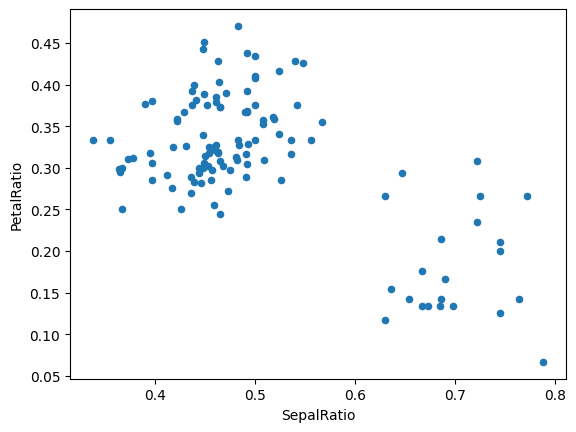

In [100]:
(
    iris.query("`sepal.length` > 5")
    .assign(
        SepalRatio=lambda x: x['sepal.width'] / x['sepal.length'],
        PetalRatio=lambda x: x['petal.width'] / x['petal.length'],
    )
    .plot(kind="scatter", x="SepalRatio", y="PetalRatio")
)

<p>Since a function is passed in, the function is computed on the DataFrame
being assigned to. Importantly, this is the DataFrame that’s been filtered to those rows with sepal length greater than 5. The filtering happens first, and then the ratio calculations.
This is an example where we didn’t have a reference to the <em>filtered</em> DataFrame available.</p>

<p>The function signature for <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html#pandas.DataFrame.assign" title="pandas.DataFrame.assign"><code>assign()</code></a> is simply <code>**kwargs</code>. The keys are the column names for the new fields, and the values are either a value to be inserted (for example, a <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series" title="pandas.Series"><code>Series</code></a> or NumPy array), or a function of one argument to be called on the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame" title="pandas.DataFrame"><code>DataFrame</code></a>.
A <em>copy</em> of the original <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame" title="pandas.DataFrame"><code>DataFrame</code></a> is returned, with the new values inserted.</p>

<p>The order of <code>**kwargs</code> is preserved. This allows
for <em>dependent</em> assignment, where an expression later in <code>**kwargs</code> can refer to a column created earlier in the same <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.assign.html#pandas.DataFrame.assign" title="pandas.DataFrame.assign"><code>assign()</code></a>.</p>

In [101]:
dfa = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})

In [102]:
dfa

,A,B
0,1,4
1,2,5
2,3,6


In [103]:
dfa.assign(C=lambda x: x["A"] + x["B"], D=lambda x: x["A"] + x["C"])

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


<p>In the second expression, <code class="docutils literal notranslate"><span class="pre">x['C']</span></code> will refer to the newly created column,
that’s equal to <code class="docutils literal notranslate"><span class="pre">dfa['A']</span> <span class="pre">+</span> <span class="pre">dfa['B']</span></code>.</p>

### <h3>Indexing / selection</h3>

<p>The basics of indexing are as follows:</p>
<table>
<colgroup>
<col style="width: 50.0%">
<col style="width: 33.3%">
<col style="width: 16.7%">
</colgroup>
<thead>
<tr><th><p>Operation</p></th>
<th><p>Syntax</p></th>
<th><p>Result</p></th>
</tr>
</thead>
<tbody>
<tr><td><p>Select column</p></td>
<td><p><code>df[col]</code></p></td>
<td><p>Series</p></td>
</tr>
<tr><td><p>Select row by label</p></td>
<td><p><code>df.loc[label]</code></p></td>
<td><p>Series</p></td>
</tr>
<tr><td><p>Select row by integer location</p></td>
<td><p><code>df.iloc[loc]</code></p></td>
<td><p>Series</p></td>
</tr>
<tr><td><p>Slice rows</p></td>
<td><p><code>df[5:10]</code></p></td>
<td><p>DataFrame</p></td>
</tr>
<tr><td><p>Select rows by boolean vector</p></td>
<td><p><code>df[bool_vec]</code></p></td>
<td><p>DataFrame</p></td>
</tr>
</tbody>
</table>

<p>Row selection, for example, returns a <a class="reference internal" href="../reference/api/pandas.Series.html#pandas.Series" title="pandas.Series"><code class="xref py py-class docutils literal notranslate"><span class="pre">Series</span></code></a> whose index is the columns of the
<a class="reference internal" href="../reference/api/pandas.DataFrame.html#pandas.DataFrame" title="pandas.DataFrame"><code class="xref py py-class docutils literal notranslate"><span class="pre">DataFrame</span></code></a>:</p>

In [104]:
df.loc["b"]

,b
one,2.0
bar,2.0
flag,False
foo,bar
one_trunc,2.0


<div class="highlight-ipython notranslate"><div class="highlight"><pre id="codecell38">
<span class="gp">In [93]: </span><span class="n">df</span><span class="o">.</span><span class="n">iloc</span><span class="p">[</span><span class="mi">2</span><span class="p">]</span>
<span class="gh">Out[93]: </span>
<span class="go">one           3.0</span>
<span class="go">bar           3.0</span>
<span class="go">flag         True</span>
<span class="go">foo           bar</span>
<span class="go">one_trunc     NaN</span>
<span class="go">Name: c, dtype: object</span>
</pre>
</div>
</div>

<p>For a more exhaustive treatment of sophisticated label-based indexing and
slicing, see the <a href="https://pandas.pydata.org/docs/user_guide/indexing.html#indexing">section on indexing</a>.
We will address the fundamentals of reindexing / conforming to new sets of labels in the <a href="https://pandas.pydata.org/docs/user_guide/basics.html#basics-reindexing">section on reindexing</a>.</p>

### <h3>Data alignment and arithmetic</h3>

<p>Data alignment between <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame" title="pandas.DataFrame"><code>DataFrame</code></a> objects automatically align on <strong>both the columns and the index (row labels)</strong>. Again, the resulting object will have the union of the column and row labels.</p>

<div class="highlight-ipython notranslate"><div class="highlight"><pre id="codecell39"><span></span><span class="gp">In [94]: </span><span class="n">df</span> <span class="o">=</span> <span class="n">pd</span><span class="o">.</span><span class="n">DataFrame</span><span class="p">(</span><span class="n">np</span><span class="o">.</span><span class="n">random</span><span class="o">.</span><span class="n">randn</span><span class="p">(</span><span class="mi">10</span><span class="p">,</span> <span class="mi">4</span><span class="p">),</span> <span class="n">columns</span><span class="o">=</span><span class="p">[</span><span class="s2">"A"</span><span class="p">,</span> <span class="s2">"B"</span><span class="p">,</span> <span class="s2">"C"</span><span class="p">,</span> <span class="s2">"D"</span><span class="p">])</span>

<span class="gp">In [95]: </span><span class="n">df2</span> <span class="o">=</span> <span class="n">pd</span><span class="o">.</span><span class="n">DataFrame</span><span class="p">(</span><span class="n">np</span><span class="o">.</span><span class="n">random</span><span class="o">.</span><span class="n">randn</span><span class="p">(</span><span class="mi">7</span><span class="p">,</span> <span class="mi">3</span><span class="p">),</span> <span class="n">columns</span><span class="o">=</span><span class="p">[</span><span class="s2">"A"</span><span class="p">,</span> <span class="s2">"B"</span><span class="p">,</span> <span class="s2">"C"</span><span class="p">])</span>

<span class="gp">In [96]: </span><span class="n">df</span> <span class="o">+</span> <span class="n">df2</span>
<span class="gh">Out[96]: </span>
<span class="go">          A         B         C   D</span>
<span class="go">0  0.045691 -0.014138  1.380871 NaN</span>
<span class="go">1 -0.955398 -1.501007  0.037181 NaN</span>
<span class="go">2 -0.662690  1.534833 -0.859691 NaN</span>
<span class="go">3 -2.452949  1.237274 -0.133712 NaN</span>
<span class="go">4  1.414490  1.951676 -2.320422 NaN</span>
<span class="go">5 -0.494922 -1.649727 -1.084601 NaN</span>
<span class="go">6 -1.047551 -0.748572 -0.805479 NaN</span>
<span class="go">7       NaN       NaN       NaN NaN</span>
<span class="go">8       NaN       NaN       NaN NaN</span>
<span class="go">9       NaN       NaN       NaN NaN</span>
</pre>
</div>
</div>

<p>When doing an operation between <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame" title="pandas.DataFrame"><code>DataFrame</code></a> and <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series" title="pandas.Series"><code>Series</code></a>, the default behavior is to align the <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series" title="pandas.Series"><code>Series</code></a> <strong>index</strong> on the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame" title="pandas.DataFrame"><code>DataFrame</code></a> <strong>columns</strong>, thus <a href="https://numpy.org/doc/stable/user/basics.broadcasting.html">broadcasting</a> row-wise. For example:</p>

<div class="highlight-ipython notranslate"><div class="highlight"><pre id="codecell40"><span></span><span class="gp">In [97]: </span><span class="n">df</span> <span class="o">-</span> <span class="n">df</span><span class="o">.</span><span class="n">iloc</span><span class="p">[</span><span class="mi">0</span><span class="p">]</span>
<span class="gh">Out[97]: </span>
<span class="go">          A         B         C         D</span>
<span class="go">0  0.000000  0.000000  0.000000  0.000000</span>
<span class="go">1 -1.359261 -0.248717 -0.453372 -1.754659</span>
<span class="go">2  0.253128  0.829678  0.010026 -1.991234</span>
<span class="go">3 -1.311128  0.054325 -1.724913 -1.620544</span>
<span class="go">4  0.573025  1.500742 -0.676070  1.367331</span>
<span class="go">5 -1.741248  0.781993 -1.241620 -2.053136</span>
<span class="go">6 -1.240774 -0.869551 -0.153282  0.000430</span>
<span class="go">7 -0.743894  0.411013 -0.929563 -0.282386</span>
<span class="go">8 -1.194921  1.320690  0.238224 -1.482644</span>
<span class="go">9  2.293786  1.856228  0.773289 -1.446531</span>
</pre>
</div>
</div>

<p>For explicit control over the matching and broadcasting behavior, see the
section on <a href="https://pandas.pydata.org/docs/user_guide/basics.html#basics-binop">flexible binary operations</a>.</p>

<p>Arithmetic operations with scalars operate element-wise:</p>

<div class="highlight-ipython notranslate"><div class="highlight"><pre id="codecell41"><span></span><span class="gp">In [98]: </span><span class="n">df</span> <span class="o">*</span> <span class="mi">5</span> <span class="o">+</span> <span class="mi">2</span>
<span class="gh">Out[98]: </span>
<span class="go">           A         B         C          D</span>
<span class="go">0   3.359299 -0.124862  4.835102   3.381160</span>
<span class="go">1  -3.437003 -1.368449  2.568242  -5.392133</span>
<span class="go">2   4.624938  4.023526  4.885230  -6.575010</span>
<span class="go">3  -3.196342  0.146766 -3.789461  -4.721559</span>
<span class="go">4   6.224426  7.378849  1.454750  10.217815</span>
<span class="go">5  -5.346940  3.785103 -1.373001  -6.884519</span>
<span class="go">6  -2.844569 -4.472618  4.068691   3.383309</span>
<span class="go">7  -0.360173  1.930201  0.187285   1.969232</span>
<span class="go">8  -2.615303  6.478587  6.026220  -4.032059</span>
<span class="go">9  14.828230  9.156280  8.701544  -3.851494</span>

<span class="gp">In [99]: </span><span class="mi">1</span> <span class="o">/</span> <span class="n">df</span>
<span class="gh">Out[99]: </span>
<span class="go">          A          B         C           D</span>
<span class="go">0  3.678365  -2.353094  1.763605    3.620145</span>
<span class="go">1 -0.919624  -1.484363  8.799067   -0.676395</span>
<span class="go">2  1.904807   2.470934  1.732964   -0.583090</span>
<span class="go">3 -0.962215  -2.697986 -0.863638   -0.743875</span>
<span class="go">4  1.183593   0.929567 -9.170108    0.608434</span>
<span class="go">5 -0.680555   2.800959 -1.482360   -0.562777</span>
<span class="go">6 -1.032084  -0.772485  2.416988    3.614523</span>
<span class="go">7 -2.118489 -71.634509 -2.758294 -162.507295</span>
<span class="go">8 -1.083352   1.116424  1.241860   -0.828904</span>
<span class="go">9  0.389765   0.698687  0.746097   -0.854483</span>

<span class="gp">In [100]: </span><span class="n">df</span> <span class="o">**</span> <span class="mi">4</span>
<span class="gh">Out[100]: </span>
<span class="go">           A             B         C             D</span>
<span class="go">0   0.005462  3.261689e-02  0.103370  5.822320e-03</span>
<span class="go">1   1.398165  2.059869e-01  0.000167  4.777482e+00</span>
<span class="go">2   0.075962  2.682596e-02  0.110877  8.650845e+00</span>
<span class="go">3   1.166571  1.887302e-02  1.797515  3.265879e+00</span>
<span class="go">4   0.509555  1.339298e+00  0.000141  7.297019e+00</span>
<span class="go">5   4.661717  1.624699e-02  0.207103  9.969092e+00</span>
<span class="go">6   0.881334  2.808277e+00  0.029302  5.858632e-03</span>
<span class="go">7   0.049647  3.797614e-08  0.017276  1.433866e-09</span>
<span class="go">8   0.725974  6.437005e-01  0.420446  2.118275e+00</span>
<span class="go">9  43.329821  4.196326e+00  3.227153  1.875802e+00</span>
</pre>
</div>
</div>

<p>Boolean operators operate element-wise as well:</p>

<div class="highlight-ipython notranslate"><div class="highlight"><pre id="codecell42"><span></span><span class="gp">In [101]: </span><span class="n">df1</span> <span class="o">=</span> <span class="n">pd</span><span class="o">.</span><span class="n">DataFrame</span><span class="p">({</span><span class="s2">"a"</span><span class="p">:</span> <span class="p">[</span><span class="mi">1</span><span class="p">,</span> <span class="mi">0</span><span class="p">,</span> <span class="mi">1</span><span class="p">],</span> <span class="s2">"b"</span><span class="p">:</span> <span class="p">[</span><span class="mi">0</span><span class="p">,</span> <span class="mi">1</span><span class="p">,</span> <span class="mi">1</span><span class="p">]},</span> <span class="n">dtype</span><span class="o">=</span><span class="nb">bool</span><span class="p">)</span>

<span class="gp">In [102]: </span><span class="n">df2</span> <span class="o">=</span> <span class="n">pd</span><span class="o">.</span><span class="n">DataFrame</span><span class="p">({</span><span class="s2">"a"</span><span class="p">:</span> <span class="p">[</span><span class="mi">0</span><span class="p">,</span> <span class="mi">1</span><span class="p">,</span> <span class="mi">1</span><span class="p">],</span> <span class="s2">"b"</span><span class="p">:</span> <span class="p">[</span><span class="mi">1</span><span class="p">,</span> <span class="mi">1</span><span class="p">,</span> <span class="mi">0</span><span class="p">]},</span> <span class="n">dtype</span><span class="o">=</span><span class="nb">bool</span><span class="p">)</span>

<span class="gp">In [103]: </span><span class="n">df1</span> <span class="o">&amp;</span> <span class="n">df2</span>
<span class="gh">Out[103]: </span>
<span class="go">       a      b</span>
<span class="go">0  False  False</span>
<span class="go">1  False   True</span>
<span class="go">2   True  False</span>

<span class="gp">In [104]: </span><span class="n">df1</span> <span class="o">|</span> <span class="n">df2</span>
<span class="gh">Out[104]: </span>
<span class="go">      a     b</span>
<span class="go">0  True  True</span>
<span class="go">1  True  True</span>
<span class="go">2  True  True</span>

<span class="gp">In [105]: </span><span class="n">df1</span> <span class="o">^</span> <span class="n">df2</span>
<span class="gh">Out[105]: </span>
<span class="go">       a      b</span>
<span class="go">0   True   True</span>
<span class="go">1   True  False</span>
<span class="go">2  False   True</span>

<span class="gp">In [106]: </span><span class="o">-</span><span class="n">df1</span>
<span class="gh">Out[106]: </span>
<span class="go">       a      b</span>
<span class="go">0  False   True</span>
<span class="go">1   True  False</span>
<span class="go">2  False  False</span>
</pre>
</div>
</div>
</section>
<section id="transposing">

### <h3>Transposing</h3>

<p>To transpose, access the <code>T</code> attribute or <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transpose.html#pandas.DataFrame.transpose" title="pandas.DataFrame.transpose"><code>DataFrame.transpose()</code></a>, similar to an ndarray:</p>

<div class="highlight-ipython notranslate"><div class="highlight"><pre id="codecell43"><span></span><span class="go"># only show the first 5 rows</span>
<span class="gp">In [107]: </span><span class="n">df</span><span class="p">[:</span><span class="mi">5</span><span class="p">]</span><span class="o">.</span><span class="n">T</span>
<span class="gh">Out[107]: </span>
<span class="go">          0         1         2         3         4</span>
<span class="go">A  0.271860 -1.087401  0.524988 -1.039268  0.844885</span>
<span class="go">B -0.424972 -0.673690  0.404705 -0.370647  1.075770</span>
<span class="go">C  0.567020  0.113648  0.577046 -1.157892 -0.109050</span>
<span class="go">D  0.276232 -1.478427 -1.715002 -1.344312  1.643563</span>
</pre>
</div>
</div>
</section>

### <h3>DataFrame interoperability with NumPy functions</h3>

<p>Most NumPy functions can be called directly on <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series" title="pandas.Series"><code>Series</code></a> and <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame" title="pandas.DataFrame"><code>DataFrame</code></a>.</p>

<div class="highlight-ipython notranslate"><div class="highlight"><pre id="codecell44"><span></span><span class="gp">In [108]: </span><span class="n">np</span><span class="o">.</span><span class="n">exp</span><span class="p">(</span><span class="n">df</span><span class="p">)</span>
<span class="gh">Out[108]: </span>
<span class="go">           A         B         C         D</span>
<span class="go">0   1.312403  0.653788  1.763006  1.318154</span>
<span class="go">1   0.337092  0.509824  1.120358  0.227996</span>
<span class="go">2   1.690438  1.498861  1.780770  0.179963</span>
<span class="go">3   0.353713  0.690288  0.314148  0.260719</span>
<span class="go">4   2.327710  2.932249  0.896686  5.173571</span>
<span class="go">5   0.230066  1.429065  0.509360  0.169161</span>
<span class="go">6   0.379495  0.274028  1.512461  1.318720</span>
<span class="go">7   0.623732  0.986137  0.695904  0.993865</span>
<span class="go">8   0.397301  2.449092  2.237242  0.299269</span>
<span class="go">9  13.009059  4.183951  3.820223  0.310274</span>

<span class="gp">In [109]: </span><span class="n">np</span><span class="o">.</span><span class="n">asarray</span><span class="p">(</span><span class="n">df</span><span class="p">)</span>
<span class="gh">Out[109]: </span>
<span class="go">array([[ 0.2719, -0.425 ,  0.567 ,  0.2762],</span>
<span class="go">       [-1.0874, -0.6737,  0.1136, -1.4784],</span>
<span class="go">       [ 0.525 ,  0.4047,  0.577 , -1.715 ],</span>
<span class="go">       [-1.0393, -0.3706, -1.1579, -1.3443],</span>
<span class="go">       [ 0.8449,  1.0758, -0.109 ,  1.6436],</span>
<span class="go">       [-1.4694,  0.357 , -0.6746, -1.7769],</span>
<span class="go">       [-0.9689, -1.2945,  0.4137,  0.2767],</span>
<span class="go">       [-0.472 , -0.014 , -0.3625, -0.0062],</span>
<span class="go">       [-0.9231,  0.8957,  0.8052, -1.2064],</span>
<span class="go">       [ 2.5656,  1.4313,  1.3403, -1.1703]])</span>
</pre>
</div>
</div>

<p><a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame"><code>DataFrame</code></a> is not intended to be a drop-in replacement for ndarray as its indexing semantics and data model are quite different in places from an n-dimensional array.</p>

<p><a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series" title="pandas.Series"><code>Series</code></a> implements <code>__array_ufunc__</code>, which allows it to work with NumPy’s
<a href="https://numpy.org/doc/stable/reference/ufuncs.html">universal functions</a>.</p>

<p>The ufunc is applied to the underlying array in a <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series" title="pandas.Series"><code>Series</code></a>.</p>

<div class="highlight-ipython notranslate"><div class="highlight"><pre id="codecell45"><span></span><span class="gp">In [110]: </span><span class="n">ser</span> <span class="o">=</span> <span class="n">pd</span><span class="o">.</span><span class="n">Series</span><span class="p">([</span><span class="mi">1</span><span class="p">,</span> <span class="mi">2</span><span class="p">,</span> <span class="mi">3</span><span class="p">,</span> <span class="mi">4</span><span class="p">])</span>

<span class="gp">In [111]: </span><span class="n">np</span><span class="o">.</span><span class="n">exp</span><span class="p">(</span><span class="n">ser</span><span class="p">)</span>
<span class="gh">Out[111]: </span>
<span class="go">0     2.718282</span>
<span class="go">1     7.389056</span>
<span class="go">2    20.085537</span>
<span class="go">3    54.598150</span>
<span class="go">dtype: float64</span>
</pre>
</div>
</div>

<p>When multiple <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series"><code>Series</code></a> are passed to a ufunc, they are aligned before performing the operation.</p>

<p>Like other parts of the library, pandas will automatically align labeled inputs as part of a ufunc with multiple inputs. For example, using <code>numpy.remainder()</code> on two <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series"><code>Series</code></a> with differently ordered labels will align before the operation.</p>

<div class="highlight-ipython notranslate"><div class="highlight"><pre id="codecell46"><span></span><span class="gp">In [112]: </span><span class="n">ser1</span> <span class="o">=</span> <span class="n">pd</span><span class="o">.</span><span class="n">Series</span><span class="p">([</span><span class="mi">1</span><span class="p">,</span> <span class="mi">2</span><span class="p">,</span> <span class="mi">3</span><span class="p">],</span> <span class="n">index</span><span class="o">=</span><span class="p">[</span><span class="s2">"a"</span><span class="p">,</span> <span class="s2">"b"</span><span class="p">,</span> <span class="s2">"c"</span><span class="p">])</span>

<span class="gp">In [113]: </span><span class="n">ser2</span> <span class="o">=</span> <span class="n">pd</span><span class="o">.</span><span class="n">Series</span><span class="p">([</span><span class="mi">1</span><span class="p">,</span> <span class="mi">3</span><span class="p">,</span> <span class="mi">5</span><span class="p">],</span> <span class="n">index</span><span class="o">=</span><span class="p">[</span><span class="s2">"b"</span><span class="p">,</span> <span class="s2">"a"</span><span class="p">,</span> <span class="s2">"c"</span><span class="p">])</span>

<span class="gp">In [114]: </span><span class="n">ser1</span>
<span class="gh">Out[114]: </span>
<span class="go">a    1</span>
<span class="go">b    2</span>
<span class="go">c    3</span>
<span class="go">dtype: int64</span>

<span class="gp">In [115]: </span><span class="n">ser2</span>
<span class="gh">Out[115]: </span>
<span class="go">b    1</span>
<span class="go">a    3</span>
<span class="go">c    5</span>
<span class="go">dtype: int64</span>

<span class="gp">In [116]: </span><span class="n">np</span><span class="o">.</span><span class="n">remainder</span><span class="p">(</span><span class="n">ser1</span><span class="p">,</span> <span class="n">ser2</span><span class="p">)</span>
<span class="gh">Out[116]: </span>
<span class="go">a    1</span>
<span class="go">b    0</span>
<span class="go">c    3</span>
<span class="go">dtype: int64</span>
</pre>
</div>
</div>

<p>As usual, the union of the two indices is taken, and non-overlapping values are filled with missing values.</p>

<div class="highlight-ipython notranslate"><div class="highlight"><pre id="codecell47"><span></span><span class="gp">In [117]: </span><span class="n">ser3</span> <span class="o">=</span> <span class="n">pd</span><span class="o">.</span><span class="n">Series</span><span class="p">([</span><span class="mi">2</span><span class="p">,</span> <span class="mi">4</span><span class="p">,</span> <span class="mi">6</span><span class="p">],</span> <span class="n">index</span><span class="o">=</span><span class="p">[</span><span class="s2">"b"</span><span class="p">,</span> <span class="s2">"c"</span><span class="p">,</span> <span class="s2">"d"</span><span class="p">])</span>

<span class="gp">In [118]: </span><span class="n">ser3</span>
<span class="gh">Out[118]: </span>
<span class="go">b    2</span>
<span class="go">c    4</span>
<span class="go">d    6</span>
<span class="go">dtype: int64</span>

<span class="gp">In [119]: </span><span class="n">np</span><span class="o">.</span><span class="n">remainder</span><span class="p">(</span><span class="n">ser1</span><span class="p">,</span> <span class="n">ser3</span><span class="p">)</span>
<span class="gh">Out[119]: </span>
<span class="go">a    NaN</span>
<span class="go">b    0.0</span>
<span class="go">c    3.0</span>
<span class="go">d    NaN</span>
<span class="go">dtype: float64</span>
</pre>
</div>
</div>

<p>When a binary ufunc is applied to a <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series" title="pandas.Series"><code>Series</code></a> and <a href="https://pandas.pydata.org/docs/reference/api/pandas.Index.html#pandas.Index" title="pandas.Index"><code>Index</code></a>, the <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series" title="pandas.Series"><code>Series</span></code></a> implementation takes precedence and a <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series" title="pandas.Series"><code>Series</code></a> is returned.</p>

<div class="highlight-ipython notranslate"><div class="highlight"><pre id="codecell48"><span></span><span class="gp">In [120]: </span><span class="n">ser</span> <span class="o">=</span> <span class="n">pd</span><span class="o">.</span><span class="n">Series</span><span class="p">([</span><span class="mi">1</span><span class="p">,</span> <span class="mi">2</span><span class="p">,</span> <span class="mi">3</span><span class="p">])</span>

<span class="gp">In [121]: </span><span class="n">idx</span> <span class="o">=</span> <span class="n">pd</span><span class="o">.</span><span class="n">Index</span><span class="p">([</span><span class="mi">4</span><span class="p">,</span> <span class="mi">5</span><span class="p">,</span> <span class="mi">6</span><span class="p">])</span>

<span class="gp">In [122]: </span><span class="n">np</span><span class="o">.</span><span class="n">maximum</span><span class="p">(</span><span class="n">ser</span><span class="p">,</span> <span class="n">idx</span><span class="p">)</span>
<span class="gh">Out[122]: </span>
<span class="go">0    4</span>
<span class="go">1    5</span>
<span class="go">2    6</span>
<span class="go">dtype: int64</span>
</pre>
</div>
</div>

<p>NumPy ufuncs are safe to apply to <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series" title="pandas.Series"><code>Series</code></a> backed by non-ndarray arrays, for example <a href="https://pandas.pydata.org/docs/reference/api/pandas.arrays.SparseArray.html#pandas.arrays.SparseArray" title="pandas.arrays.SparseArray"><code>arrays.SparseArray</code></a> (see <a href="https://pandas.pydata.org/docs/user_guide/sparse.html#sparse-calculation">Sparse calculation</a>).
If possible, the ufunc is applied without converting the underlying data to an ndarray.</p>

### <h3>Console display</h3>

<p>A very large <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame"><code>DataFrame</code></a> will be truncated to display them in the console.
You can also get a summary using <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html#pandas.DataFrame.info" title="pandas.DataFrame.info"><code>info()</code></a>.
(The <strong>baseball</strong> dataset is from the <strong>plyr</strong> R package):</p>

<div class="highlight-ipython notranslate"><div class="highlight"><pre id="codecell49"><span></span><span class="gp">In [123]: </span><span class="n">baseball</span> <span class="o">=</span> <span class="n">pd</span><span class="o">.</span><span class="n">read_csv</span><span class="p">(</span><span class="s2">"data/baseball.csv"</span><span class="p">)</span>

<span class="gp">In [124]: </span><span class="nb">print</span><span class="p">(</span><span class="n">baseball</span><span class="p">)</span>
<span class="go">       id     player  year  stint team  lg  ...    so  ibb  hbp   sh   sf  gidp</span>
<span class="go">0   88641  womacto01  2006      2  CHN  NL  ...   4.0  0.0  0.0  3.0  0.0   0.0</span>
<span class="go">1   88643  schilcu01  2006      1  BOS  AL  ...   1.0  0.0  0.0  0.0  0.0   0.0</span>
<span class="go">..    ...        ...   ...    ...  ...  ..  ...   ...  ...  ...  ...  ...   ...</span>
<span class="go">98  89533   aloumo01  2007      1  NYN  NL  ...  30.0  5.0  2.0  0.0  3.0  13.0</span>
<span class="go">99  89534  alomasa02  2007      1  NYN  NL  ...   3.0  0.0  0.0  0.0  0.0   0.0</span>

<span class="go">[100 rows x 23 columns]</span>

<span class="gp">In [125]: </span><span class="n">baseball</span><span class="o">.</span><span class="n">info</span><span class="p">()</span>
<span class="go">&lt;class 'pandas.core.frame.DataFrame'&gt;</span>
<span class="go">RangeIndex: 100 entries, 0 to 99</span>
<span class="go">Data columns (total 23 columns):</span>
<span class="go"> #   Column  Non-Null Count  Dtype  </span>
<span class="go">---  ------  --------------  -----  </span>
<span class="go"> 0   id      100 non-null    int64  </span>
<span class="go"> 1   player  100 non-null    object </span>
<span class="go"> 2   year    100 non-null    int64  </span>
<span class="go"> 3   stint   100 non-null    int64  </span>
<span class="go"> 4   team    100 non-null    object </span>
<span class="go"> 5   lg      100 non-null    object </span>
<span class="go"> 6   g       100 non-null    int64  </span>
<span class="go"> 7   ab      100 non-null    int64  </span>
<span class="go"> 8   r       100 non-null    int64  </span>
<span class="go"> 9   h       100 non-null    int64  </span>
<span class="go"> 10  X2b     100 non-null    int64  </span>
<span class="go"> 11  X3b     100 non-null    int64  </span>
<span class="go"> 12  hr      100 non-null    int64  </span>
<span class="go"> 13  rbi     100 non-null    float64</span>
<span class="go"> 14  sb      100 non-null    float64</span>
<span class="go"> 15  cs      100 non-null    float64</span>
<span class="go"> 16  bb      100 non-null    int64  </span>
<span class="go"> 17  so      100 non-null    float64</span>
<span class="go"> 18  ibb     100 non-null    float64</span>
<span class="go"> 19  hbp     100 non-null    float64</span>
<span class="go"> 20  sh      100 non-null    float64</span>
<span class="go"> 21  sf      100 non-null    float64</span>
<span class="go"> 22  gidp    100 non-null    float64</span>
<span class="go">dtypes: float64(9), int64(11), object(3)</span>
<span class="go">memory usage: 18.1+ KB</span>
</pre>
</div>
</div>

<p>However, using <a chref="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_string.html#pandas.DataFrame.to_string" title="pandas.DataFrame.to_string"><code>DataFrame.to_string()</code></a> will return a string representation of the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame" title="pandas.DataFrame"><code>DataFrame</code></a> in tabular form, though it won’t always fit the console width:</p>

<div class="highlight-ipython notranslate"><div class="highlight"><pre id="codecell50"><span></span><span class="gp">In [126]: </span><span class="nb">print</span><span class="p">(</span><span class="n">baseball</span><span class="o">.</span><span class="n">iloc</span><span class="p">[</span><span class="o">-</span><span class="mi">20</span><span class="p">:,</span> <span class="p">:</span><span class="mi">12</span><span class="p">]</span><span class="o">.</span><span class="n">to_string</span><span class="p">())</span>
<span class="go">       id     player  year  stint team  lg    g   ab   r    h  X2b  X3b</span>
<span class="go">80  89474  finlest01  2007      1  COL  NL   43   94   9   17    3    0</span>
<span class="go">81  89480  embreal01  2007      1  OAK  AL    4    0   0    0    0    0</span>
<span class="go">82  89481  edmonji01  2007      1  SLN  NL  117  365  39   92   15    2</span>
<span class="go">83  89482  easleda01  2007      1  NYN  NL   76  193  24   54    6    0</span>
<span class="go">84  89489  delgaca01  2007      1  NYN  NL  139  538  71  139   30    0</span>
<span class="go">85  89493  cormirh01  2007      1  CIN  NL    6    0   0    0    0    0</span>
<span class="go">86  89494  coninje01  2007      2  NYN  NL   21   41   2    8    2    0</span>
<span class="go">87  89495  coninje01  2007      1  CIN  NL   80  215  23   57   11    1</span>
<span class="go">88  89497  clemero02  2007      1  NYA  AL    2    2   0    1    0    0</span>
<span class="go">89  89498  claytro01  2007      2  BOS  AL    8    6   1    0    0    0</span>
<span class="go">90  89499  claytro01  2007      1  TOR  AL   69  189  23   48   14    0</span>
<span class="go">91  89501  cirilje01  2007      2  ARI  NL   28   40   6    8    4    0</span>
<span class="go">92  89502  cirilje01  2007      1  MIN  AL   50  153  18   40    9    2</span>
<span class="go">93  89521  bondsba01  2007      1  SFN  NL  126  340  75   94   14    0</span>
<span class="go">94  89523  biggicr01  2007      1  HOU  NL  141  517  68  130   31    3</span>
<span class="go">95  89525  benitar01  2007      2  FLO  NL   34    0   0    0    0    0</span>
<span class="go">96  89526  benitar01  2007      1  SFN  NL   19    0   0    0    0    0</span>
<span class="go">97  89530  ausmubr01  2007      1  HOU  NL  117  349  38   82   16    3</span>
<span class="go">98  89533   aloumo01  2007      1  NYN  NL   87  328  51  112   19    1</span>
<span class="go">99  89534  alomasa02  2007      1  NYN  NL    8   22   1    3    1    0</span>
</pre>
</div>
</div>

<p>Wide DataFrames will be printed across multiple rows by default:</p>

<div class="highlight-ipython notranslate"><div class="highlight"><pre id="codecell51"><span></span><span class="gp">In [127]: </span><span class="n">pd</span><span class="o">.</span><span class="n">DataFrame</span><span class="p">(</span><span class="n">np</span><span class="o">.</span><span class="n">random</span><span class="o">.</span><span class="n">randn</span><span class="p">(</span><span class="mi">3</span><span class="p">,</span> <span class="mi">12</span><span class="p">))</span>
<span class="gh">Out[127]: </span>
<span class="go">         0         1         2   ...        9         10        11</span>
<span class="go">0 -1.226825  0.769804 -1.281247  ... -1.110336 -0.619976  0.149748</span>
<span class="go">1 -0.732339  0.687738  0.176444  ...  1.462696 -1.743161 -0.826591</span>
<span class="go">2 -0.345352  1.314232  0.690579  ...  0.896171 -0.487602 -0.082240</span>

<span class="go">[3 rows x 12 columns]</span>
</pre>
</div>
</div>

<p>You can change how much to print on a single row by setting the <code>display.width</code> option:</p>

<div class="highlight-ipython notranslate"><div class="highlight"><pre id="codecell52"><span></span><span class="gp">In [128]: </span><span class="n">pd</span><span class="o">.</span><span class="n">set_option</span><span class="p">(</span><span class="s2">"display.width"</span><span class="p">,</span> <span class="mi">40</span><span class="p">)</span>  <span class="c1"># default is 80</span>

<span class="gp">In [129]: </span><span class="n">pd</span><span class="o">.</span><span class="n">DataFrame</span><span class="p">(</span><span class="n">np</span><span class="o">.</span><span class="n">random</span><span class="o">.</span><span class="n">randn</span><span class="p">(</span><span class="mi">3</span><span class="p">,</span> <span class="mi">12</span><span class="p">))</span>
<span class="gh">Out[129]: </span>
<span class="go">         0         1         2   ...        9         10        11</span>
<span class="go">0 -2.182937  0.380396  0.084844  ... -0.023688  2.410179  1.450520</span>
<span class="go">1  0.206053 -0.251905 -2.213588  ... -0.025747 -0.988387  0.094055</span>
<span class="go">2  1.262731  1.289997  0.082423  ... -0.281461  0.030711  0.109121</span>

<span class="go">[3 rows x 12 columns]</span>
</pre>
</div>
</div>

<p>You can adjust the max width of the individual columns by setting <code class="docutils literal notranslate"><span class="pre">display.max_colwidth</span></code></p>

<div class="highlight-ipython notranslate"><div class="highlight"><pre id="codecell53"><span></span><span class="gp">In [130]: </span><span class="n">datafile</span> <span class="o">=</span> <span class="p">{</span>
<span class="gp">   .....: </span>    <span class="s2">"filename"</span><span class="p">:</span> <span class="p">[</span><span class="s2">"filename_01"</span><span class="p">,</span> <span class="s2">"filename_02"</span><span class="p">],</span>
<span class="gp">   .....: </span>    <span class="s2">"path"</span><span class="p">:</span> <span class="p">[</span>
<span class="gp">   .....: </span>        <span class="s2">"media/user_name/storage/folder_01/filename_01"</span><span class="p">,</span>
<span class="gp">   .....: </span>        <span class="s2">"media/user_name/storage/folder_02/filename_02"</span><span class="p">,</span>
<span class="gp">   .....: </span>    <span class="p">],</span>
<span class="gp">   .....: </span><span class="p">}</span>
<span class="gp">   .....: </span>

<span class="gp">In [131]: </span><span class="n">pd</span><span class="o">.</span><span class="n">set_option</span><span class="p">(</span><span class="s2">"display.max_colwidth"</span><span class="p">,</span> <span class="mi">30</span><span class="p">)</span>

<span class="gp">In [132]: </span><span class="n">pd</span><span class="o">.</span><span class="n">DataFrame</span><span class="p">(</span><span class="n">datafile</span><span class="p">)</span>
<span class="gh">Out[132]: </span>
<span class="go">      filename                           path</span>
<span class="go">0  filename_01  media/user_name/storage/fo...</span>
<span class="go">1  filename_02  media/user_name/storage/fo...</span>

<span class="gp">In [133]: </span><span class="n">pd</span><span class="o">.</span><span class="n">set_option</span><span class="p">(</span><span class="s2">"display.max_colwidth"</span><span class="p">,</span> <span class="mi">100</span><span class="p">)</span>

<span class="gp">In [134]: </span><span class="n">pd</span><span class="o">.</span><span class="n">DataFrame</span><span class="p">(</span><span class="n">datafile</span><span class="p">)</span>
<span class="gh">Out[134]: </span>
<span class="go">      filename                                           path</span>
<span class="go">0  filename_01  media/user_name/storage/folder_01/filename_01</span>
<span class="go">1  filename_02  media/user_name/storage/folder_02/filename_02</span>
</pre>
</div>
</div>

<p>You can also disable this feature via the <code>expand_frame_repr</code> option. This will print the table in one block.</p>

### <h3>DataFrame column attribute access and IPython completion</h3>

<p>If a <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame"><code>DataFrame</code></a> column label is a valid Python variable name, the column can be accessed like an attribute:</p>

<div class="highlight-ipython notranslate"><div class="highlight"><pre id="codecell54"><span></span><span class="gp">In [135]: </span><span class="n">df</span> <span class="o">=</span> <span class="n">pd</span><span class="o">.</span><span class="n">DataFrame</span><span class="p">({</span><span class="s2">"foo1"</span><span class="p">:</span> <span class="n">np</span><span class="o">.</span><span class="n">random</span><span class="o">.</span><span class="n">randn</span><span class="p">(</span><span class="mi">5</span><span class="p">),</span> <span class="s2">"foo2"</span><span class="p">:</span> <span class="n">np</span><span class="o">.</span><span class="n">random</span><span class="o">.</span><span class="n">randn</span><span class="p">(</span><span class="mi">5</span><span class="p">)})</span>

<span class="gp">In [136]: </span><span class="n">df</span>
<span class="gh">Out[136]: </span>
<span class="go">       foo1      foo2</span>
<span class="go">0  1.126203  0.781836</span>
<span class="go">1 -0.977349 -1.071357</span>
<span class="go">2  1.474071  0.441153</span>
<span class="go">3 -0.064034  2.353925</span>
<span class="go">4 -1.282782  0.583787</span>

<span class="gp">In [137]: </span><span class="n">df</span><span class="o">.</span><span class="n">foo1</span>
<span class="gh">Out[137]: </span>
<span class="go">0    1.126203</span>
<span class="go">1   -0.977349</span>
<span class="go">2    1.474071</span>
<span class="go">3   -0.064034</span>
<span class="go">4   -1.282782</span>
<span class="go">Name: foo1, dtype: float64</span>
</pre>
</div>
</div>

<p>The columns are also connected to the <a href="https://ipython.org">IPython</a> completion mechanism so they can be tab-completed:</p>

<div class="highlight-ipython notranslate"><div class="highlight"><pre id="codecell55"><span></span><span class="gp">In [5]: </span><span class="n">df</span><span class="o">.</span><span class="n">foo</span><span class="o">&lt;</span><span class="n">TAB</span><span class="o">&gt;</span>  <span class="c1"># noqa: E225, E999</span>
<span class="go">df.foo1  df.foo2</span>
</pre>
</div>
</div>
</section>
</section>
</section>